<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       49 non-null     int64  
 1   sex       49 non-null     object 
 2   bmi       49 non-null     float64
 3   children  49 non-null     int64  
 4   smoker    49 non-null     object 
 5   region    49 non-null     object 
 6   charges   49 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.8+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Sex Value Encoding: {'female': 1, 'male': 0}
Smoker Value Encoding: {'no': 1, 'yes': 0}
   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    1  27.900         0       0  16884.92400             False   
1   18    0  33.770         1       1   1725.55230             False   
2   28    0  33.000         3       1   4449.46200             Fa

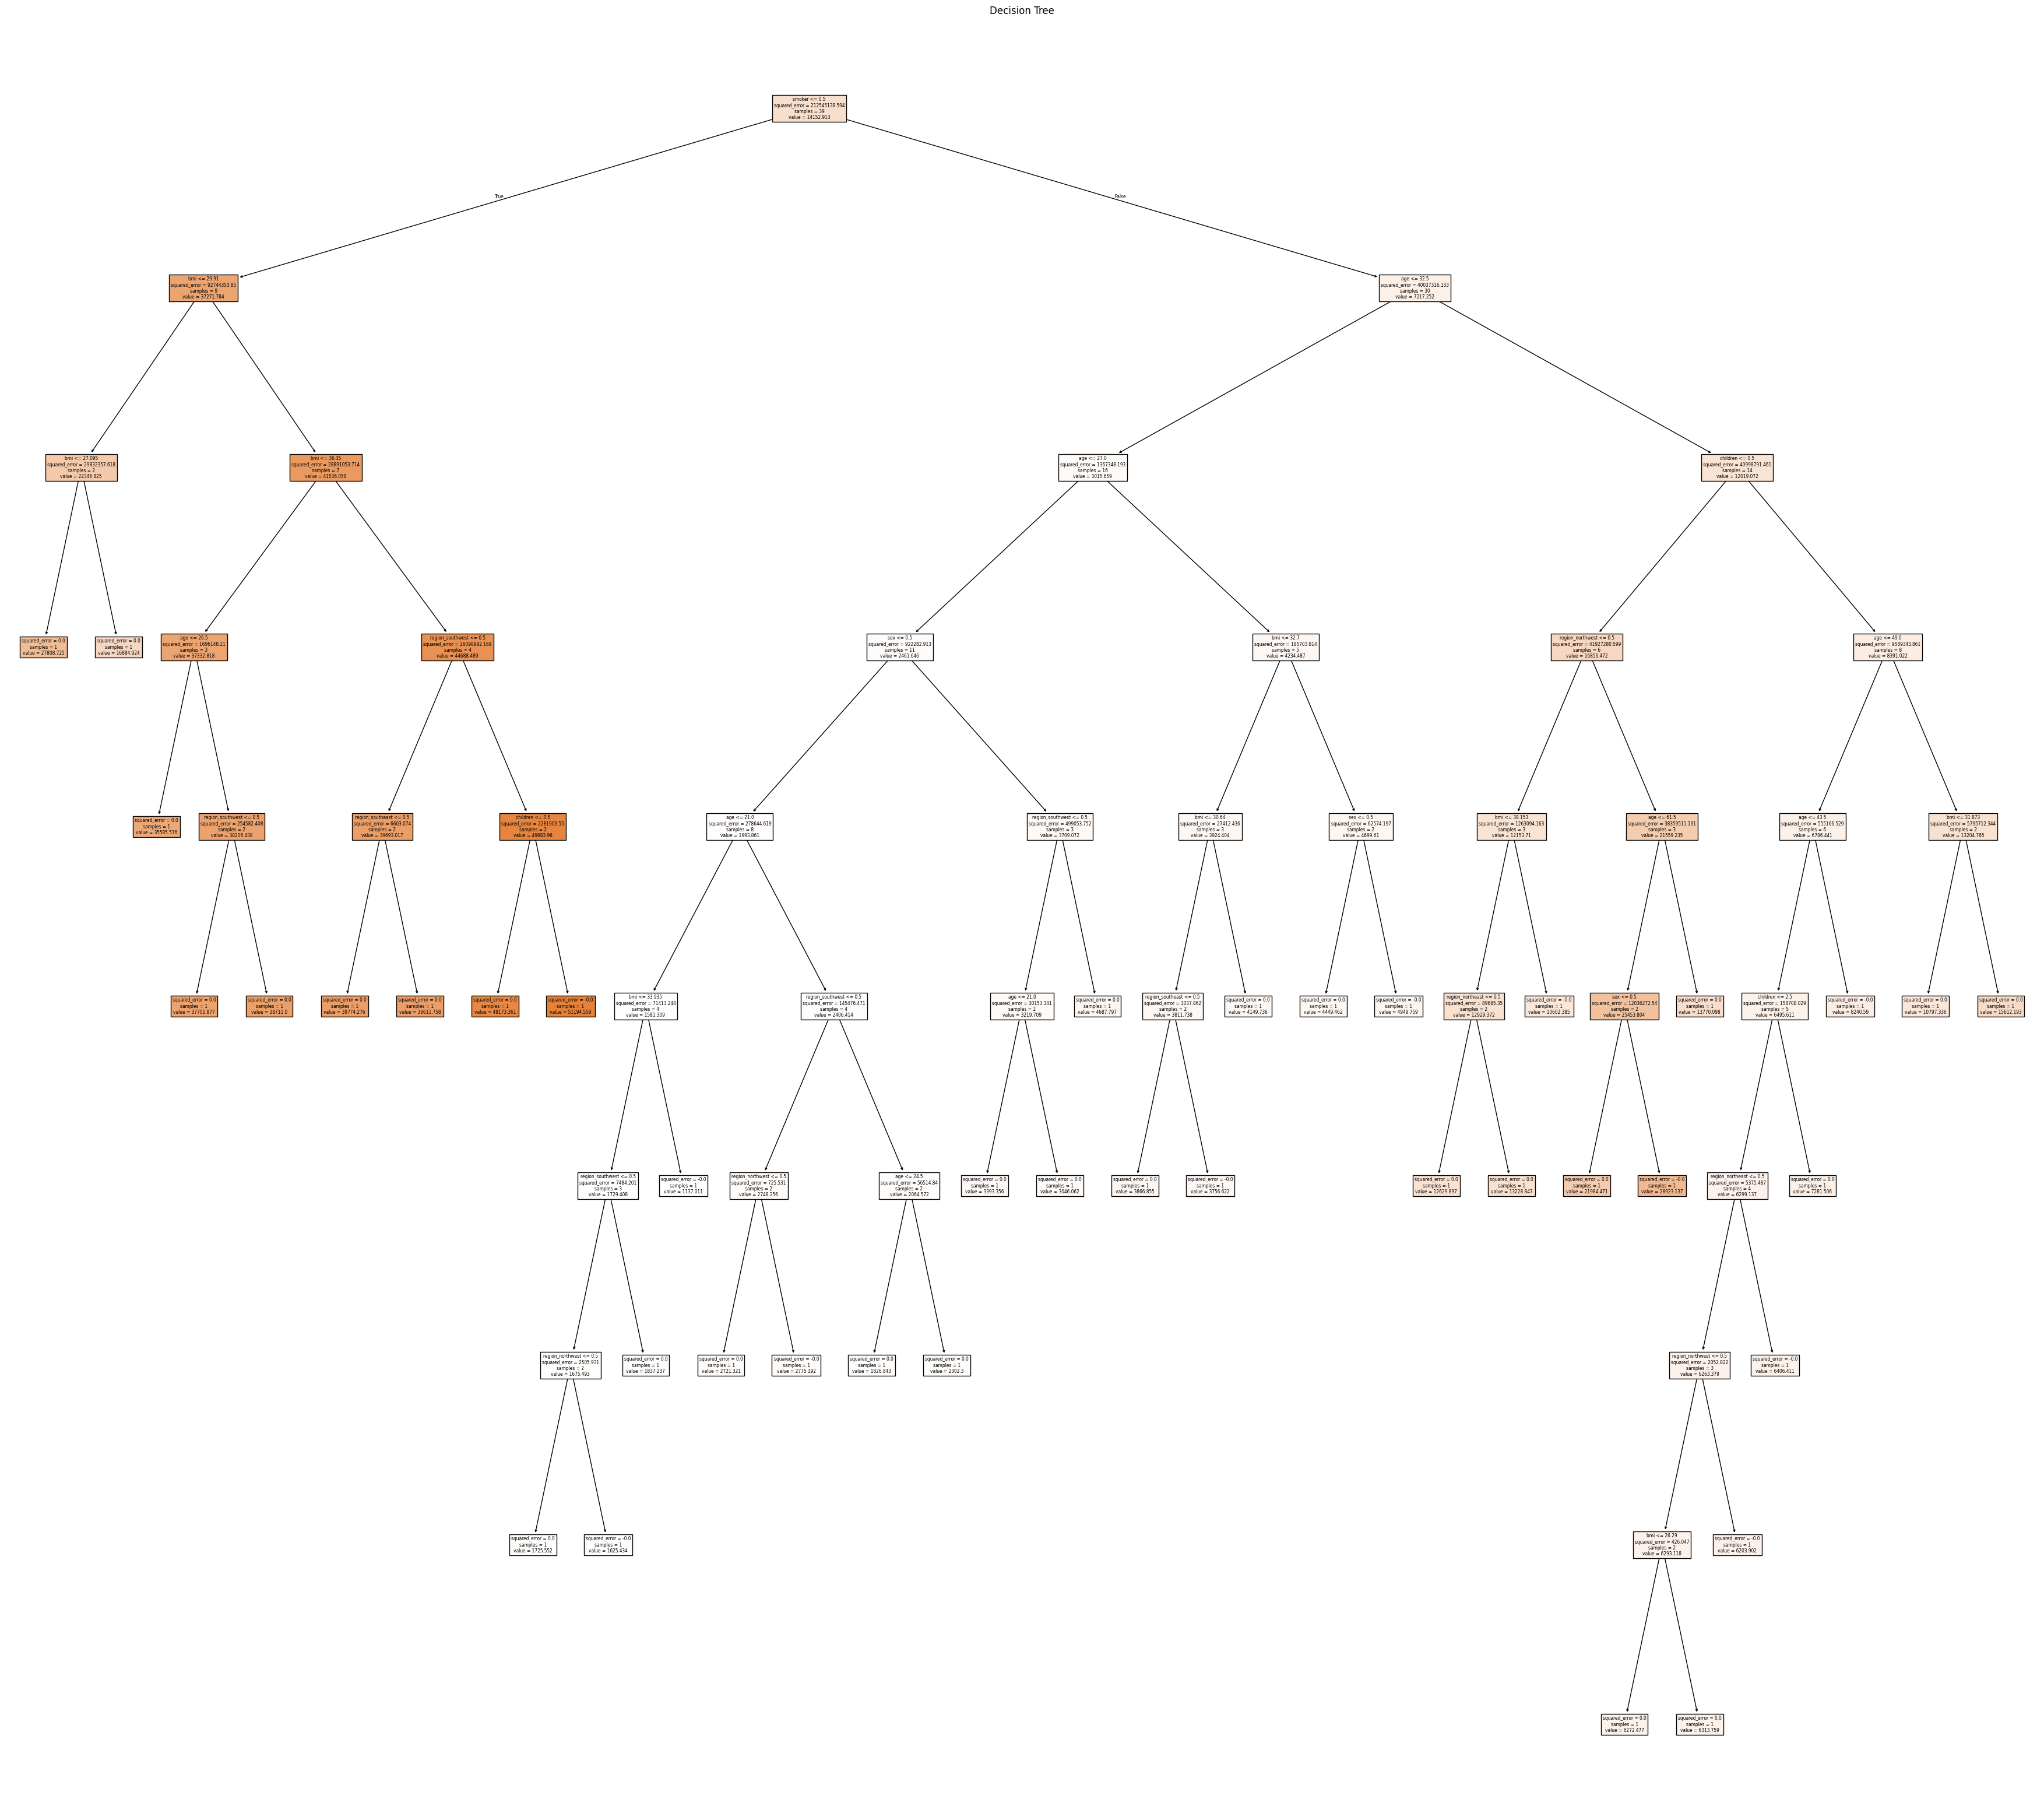

Mean Squared Error (Train) ---> 0.0
Mean Absolute Error (Train) ---> 0.0
Root Mean Square Error (Train) ---> 0.0
R² Score (Train) ---> 1.0
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')
{'sex': {'female': 1, 'male': 0}, 'smoker_value': {'no': 1, 'yes': 0}, 'columns': ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']}
region_northeast
5
[21.   1.  33.7  1.   1.   1.   0.   0.   0. ]
Predicted Medical Insurance Charges is: 3393.36 /- Rs. Only


In [6]:
#Decision Tree Algorithm.
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("expenses.csv")

# Display dataset info
print(df.info())

# Check for missing values
print(df.isna().sum())

# Converting categorical columns into numeric
df['sex'].replace({"male": 0, "female": 1}, inplace=True)
sex_value = {"female": 1, "male": 0}
print("Sex Value Encoding:", sex_value)

df['smoker'].replace({"yes": 0, "no": 1}, inplace=True)
smoker_value = {"no": 1, "yes": 0}
print("Smoker Value Encoding:", smoker_value)

# Convert 'region' column into dummy variables (one-hot encoding)
df = pd.get_dummies(df, columns=['region'])
print(df.head())

# Define feature matrix (X) and target variable (y)
X = df.drop("charges", axis=1)  # Dropping the target variable 'charges'
y = df["charges"]  # Target variable


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot the Decision Tree
plt.figure(figsize=(45, 40))
plot_tree(dt_reg, filled=True, feature_names=X.columns)
plt.title("Decision Tree")
plt.show()

# Training error analysis
y_pred_train = dt_reg.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (Train) --->", mse_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Train) --->", mae_train)

rmse_train = np.sqrt(mse_train)
print("Root Mean Square Error (Train) --->", rmse_train)

r2_train = r2_score(y_train, y_pred_train)
print("R² Score (Train) --->", r2_train)

# Display feature column names
column_names = X.columns
print(column_names)

# Create JSON-like data structure for model features and encodings
json_data = {
    "sex": sex_value,
    "smoker_value": smoker_value,
    "columns": list(column_names)
}
print(json_data)


# Define sample inputs for prediction
age = 21.0
sex = "female"
bmi = 33.7
children = 1.0
smoker = "no"
region = "northeast"

# Convert region to its corresponding column name in one-hot encoding
region = "region_" + region
print(region)

# Find the index of the region column in the feature list
region_index = list(column_names).index(region)
print(region_index)

# Prepare the input array for prediction
test_array = np.zeros(len(column_names))

test_array[0] = age
test_array[1] = json_data['sex'][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = json_data['smoker_value'][smoker]
test_array[region_index] = 1

print(test_array)

# Predict charges using the trained model
charges = round(dt_reg.predict([test_array])[0], 2)
print("Predicted Medical Insurance Charges is:", charges, "/- Rs. Only")